In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Util

In [15]:
Data_list = {
    "Thursday" : "Data/Fitbit-Intraday-Heartrate-22DK98-2023-05-11.xlsx",
    "Friday" : "Data/Fitbit-Intraday-Heartrate-22DK98-2023-05-12.xlsx",
    "Saturday" : "Data/Fitbit-Intraday-Heartrate-22DK98-2023-05-13.xlsx",
    "Sunday" : "Data/Fitbit-Intraday-Heartrate-22DK98-2023-05-14.xlsx",
    "Monday" : "Data/Fitbit-Intraday-Heartrate-22DK98-2023-05-15.xlsx",
    "Tuesday" : "Data/Fitbit-Intraday-Heartrate-22DK98-2023-05-16.xlsx",
    "Wednesday" : "Data/Fitbit-Intraday-Heartrate-22DK98-2023-05-17.xlsx",
}

In [16]:
Data_dictionary = {"Day" : [], "Min" : np.linspace(0, 60 * 24 - 1, 60 * 24).astype(np.int32), "Data each day" : [], "Every data" : []}
for day, data_excel in Data_list.items():
    data = Util.get_data(data_excel)
    Data_dictionary["Day"].append(day)
    Data_dictionary["Every data"] += list(data.values())
    Data_dictionary["Data each day"].append(list(data.values()))

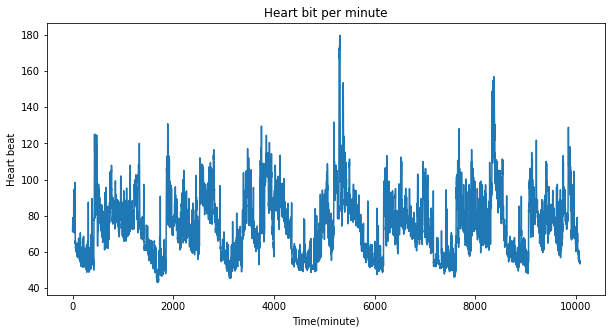

In [4]:
plt.figure(figsize = (10, 5))
plt.plot(Data_dictionary["Every data"])
plt.xlabel("Time(minute)")
plt.ylabel("Heart beat")
plt.title("Heart bit per minute")
plt.show()

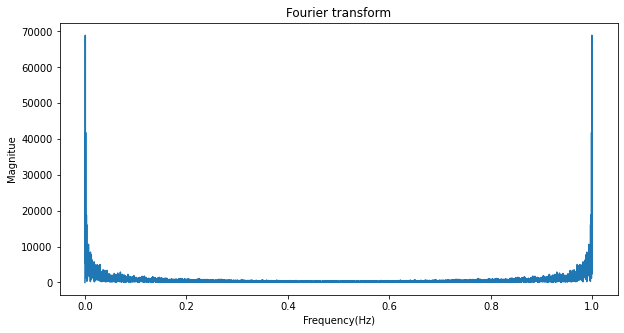

When frequency = 0.0006944444444444445Hz (1440.0 min) has maximum value


In [5]:
Fourier_domain = abs(np.fft.fft([d - np.mean(Data_dictionary["Every data"]) for d in Data_dictionary["Every data"]]))
frequency = np.linspace(0, 1 - 1 / len(Fourier_domain), len(Fourier_domain))
plt.figure(figsize = (10, 5))
plt.plot(frequency, Fourier_domain)
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitue")
plt.title("Fourier transform")
plt.show()

max_index = np.argmax(Fourier_domain)
print("When frequency = " + str(frequency[max_index]) + "Hz (" + str(1 / frequency[max_index]) +" min) has maximum value")

In [6]:
Data_autocorrelation = Util.auto_correlation(Data_dictionary["Every data"])

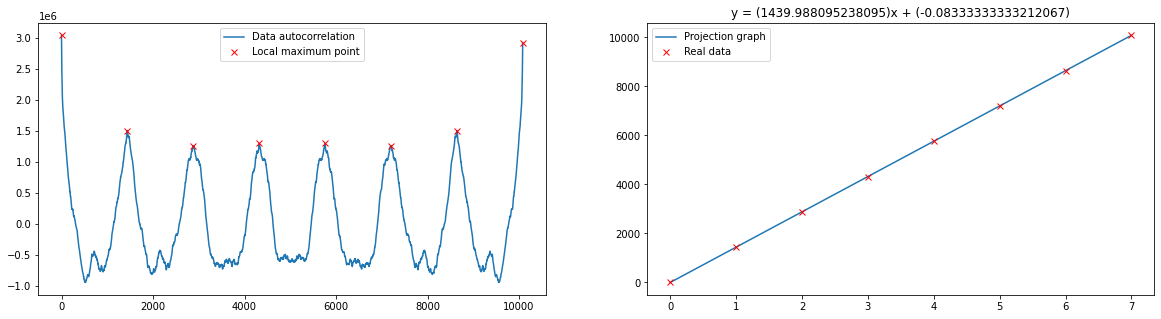

In [7]:
Check_point = []
for i in range(len(Data_autocorrelation)):
    if Util.is_local_maximum(Data_autocorrelation, i, gap = 1000):
        Check_point.append(i)

plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.plot(Data_autocorrelation, label = 'Data autocorrelation')
plt.plot(Check_point, [Data_autocorrelation[i] for i in Check_point], "rx", label = 'Local maximum point')
plt.legend()

plt.subplot(1, 2, 2)
a, b = Util.linear_projection(Check_point)
x = np.linspace(0, len(Check_point) - 1, 1000)
y = a * x + b
plt.plot(x, y, label = 'Projection graph')
plt.plot(np.linspace(0, len(Check_point) - 1, len(Check_point)), Check_point, "rx", label = 'Real data')
plt.title("y = (" + str(a[0]) + ")x + (" + str(b[0]) + ")")
plt.legend()
plt.show()

In [17]:
Data_dictionary["Data each day"]
Chart = np.zeros((len(Data_dictionary["Data each day"]), len(Data_dictionary["Data each day"])))
for i in range(len(Data_dictionary["Data each day"])):
    for j in range(len(Data_dictionary["Data each day"])):
        Chart[i, j] = Util.correlation_coefficient(Data_dictionary["Data each day"][i], Data_dictionary["Data each day"][j])

In [18]:
df = pd.DataFrame(Chart, Data_dictionary["Day"], Data_dictionary["Day"])
df

,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday
Thursday,1.000000,0.642422,0.373873,0.274402,0.612287,0.526032,0.642693
Friday,0.642422,1.000000,0.339871,0.259716,0.609731,0.702507,0.613448
Saturday,0.373873,0.339871,1.000000,0.649311,0.363100,0.391921,0.341303
Sunday,0.274402,0.259716,0.649311,1.000000,0.277801,0.327287,0.279683
Monday,0.612287,0.609731,0.363100,0.277801,1.000000,0.533149,0.707654
Tuesday,0.526032,0.702507,0.391921,0.327287,0.533149,1.000000,0.599969
Wednesday,0.642693,0.613448,0.341303,0.279683,0.707654,0.599969,1.000000
